## Kernel Regression

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils import check_array, check_X_y
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import cross_val_score

In [2]:
class KernelRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, K=None, h=None):
        if K is None:
            raise Exception("K cannot be None.")
        if h is None:
            raise Exception("h cannot be None.")        
        self.K = K
        self.h = h
        
    def fit(self, X, y):
        _X, _y = check_X_y(X, y)
        self._X = _X
        self._y = _y
    
    def predict(self, X):
        X = check_array(X);
        dists = pairwise_distances(self._X, X)
        K_values = self.K(dists/self.h)
        return np.sum(K_values*self._y.reshape(-1, 1), axis=0)/np.sum(K_values, axis=0)

def B(u):
    return 0.5*(np.abs(u) < 1)
    
def T(u):
    return (1 - np.abs(u))*(np.abs(u) < 1)

def G(u):
    return np.exp(-np.square(u)/2)/np.sqrt(2*np.pi)

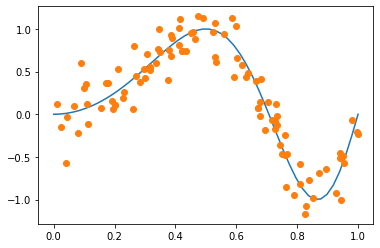

In [3]:
np.random.seed(668)

def y_true(x):
    return np.sin(x*(2*np.pi*x))

t = np.linspace(0, 1)

n = 100
X = np.random.uniform(size=n)
y = y_true(X) + np.random.normal(0, 0.2, size=n)

plt.plot(t, y_true(t))
plt.plot(X, y, 'o')

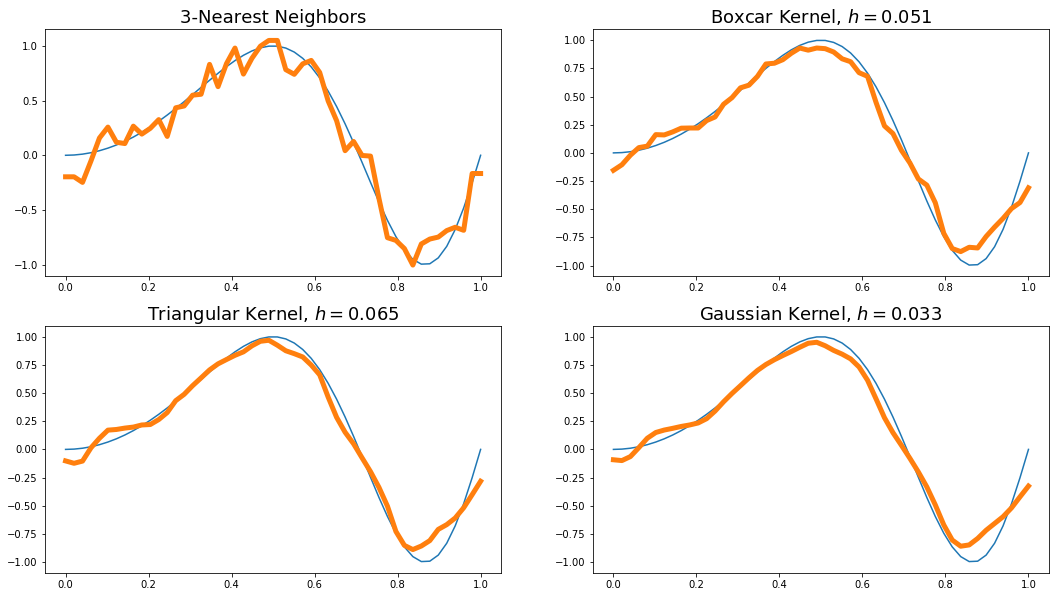

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
[[a0, a1], [a2, a3]] = axes

M = KNeighborsRegressor(n_neighbors=3)
M.fit(X.reshape(-1, 1), y)
y_pred = M.predict(t.reshape(-1, 1))
a0.plot(t, y_true(t))
a0.plot(t, y_pred, '-', lw=5)
a0.set_title("3-Nearest Neighbors", fontsize=18)

N = KernelRegressor(K=B, h=0.051)
N.fit(X.reshape(-1, 1), y)
y_pred = N.predict(t.reshape(-1, 1))
a1.plot(t, y_true(t))
a1.plot(t, y_pred, '-', lw=5)
a1.set_title("Boxcar Kernel, $h=0.051$", fontsize=18)

O = KernelRegressor(K=T, h=0.065)
O.fit(X.reshape(-1, 1), y)
y_pred = O.predict(t.reshape(-1, 1))
a2.plot(t, y_true(t))
a2.plot(t, y_pred, '-', lw=5)
a2.set_title("Triangular Kernel, $h=0.065$", fontsize=18)

P = KernelRegressor(K=G, h=0.033)
P.fit(X.reshape(-1, 1), y)
y_pred = P.predict(t.reshape(-1, 1))
a3.plot(t, y_true(t))
a3.plot(t, y_pred, '-', lw=5);
a3.set_title("Gaussian Kernel, $h=0.033$", fontsize=18);

In [5]:
scores = []
ks = np.arange(1, 10)
for k in ks:
    M = KNeighborsRegressor(n_neighbors=k)
    score = np.mean(-cross_val_score(M, X.reshape(-1, 1), y, cv=5, scoring="neg_mean_squared_error"))
    scores.append(score)
    
print(f"optimal k = {ks[np.argmin(scores)]}")

optimal k = 3


In [6]:
scores = []
hs = np.arange(0.035, 0.1, 0.001)
for h in hs:
    M = KernelRegressor(K=B, h=h)
    score = np.mean(-cross_val_score(M, X.reshape(-1, 1), y, cv=5, scoring="neg_mean_squared_error"))
    scores.append(score)
    
print(f"optimal h = {hs[np.argmin(scores)]}")

optimal h = 0.05100000000000002


In [7]:
scores = []
hs = np.arange(0.035, 0.1, 0.001)
for h in hs:
    M = KernelRegressor(K=T, h=h)
    score = np.mean(-cross_val_score(M, X.reshape(-1, 1), y, cv=5, scoring="neg_mean_squared_error"))
    scores.append(score)
    
print(f"optimal h = {hs[np.argmin(scores)]}")

optimal h = 0.06500000000000003


In [8]:
scores = []
hs = np.arange(0.01, 0.1, 0.001)
for h in hs:
    M = KernelRegressor(K=G, h=h)
    score = np.mean(-cross_val_score(M, X.reshape(-1, 1), y, cv=5, scoring="neg_mean_squared_error"))
    scores.append(score)
    
print(f"optimal h = {hs[np.argmin(scores)]}")

optimal h = 0.03299999999999998
